## This is to estimate how much is someone's medical bill going to be, depending on their BMI, smoking habit, gender, number of children, and age

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
#import the csv file
bill = pd.read_csv('insurance.csv', sep=',')

In [8]:
bill

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
#1338 rows and 7 columns were presented in the csv file
bill.shape

(1338, 7)

In [10]:
#data type of the columns
bill.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
#Create numeric values for the smoking habit
condition =[(bill['smoker'] == 'yes'), (bill['smoker'] == 'no')]
values = [1,0]

bill['smoking_habit'] = np.select(condition, values)

In [12]:
#see if there's any null value in the dataset
bill.isnull().values.any()

False

In [13]:
#see if any na value in the dataset
bill.isna().values.any()

False

In [14]:
#see how many male and female patients in this csv file, they are quite balanced
bill.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [15]:
#regions where the patients are from, a bit more from southeast than in northeast
bill.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
bill.describe()

,age,bmi,children,charges,smoking_habit
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


In [89]:
smokers = bill.loc[bill['smoking_habit'] == 1]
nonsmokers = bill.loc[bill['smoking_habit'] == 0]
print('There are',len(smokers), 'smoker patients.')
print('There are',len(nonsmokers), 'non-smoker patients.')

There are 274 smoker patients.
There are 1064 non-smoker patients.


In [84]:
underweight = bill.loc[bill['BMI_Classification'] == 0]
print('There are',len(underweight), 'underweight patients.')
normal = bill.loc[bill['BMI_Classification'] == 1]
print('There are', len(normal), 'normal weight patients.')
overweight = bill.loc[bill['BMI_Classification'] == 2]
print('There are', len(overweight), 'overweight patients.')
c1_obese = bill.loc[bill['BMI_Classification'] == 3]
print('There are', len(c1_obese), 'class 1 obese patients.')
c2_obese = bill.loc[bill['BMI_Classification'] == 4]
print('There are', len(c2_obese), 'class 2 obese patients.')
morbid = bill.loc[bill['BMI_Classification'] == 5]
print('There are', len(morbid), 'morbid obese patients.')

There are 21 underweight patients.
There are 224 normal weight patients.
There are 386 overweight patients.
There are 391 class 1 obese patients.
There are 224 class 2 obese patients.
There are 92 morbid obese patients.


In [79]:
len(underweight)

21

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>],
       [<AxesSubplot:title={'center':'smoking_habit'}>, <AxesSubplot:>]],
      dtype=object)

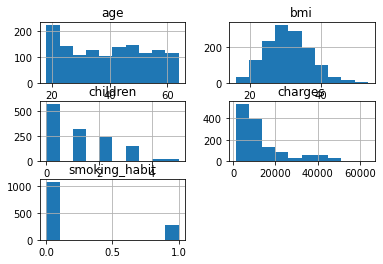

In [18]:
#There are a bit more young adult patients than mid-age and older adults, most of the patients have the bmi around
#30, most patients have less than 2 kids, and most of the charges are less than $20,000, and most people are not
#smokers
bill.hist()

In [19]:
#checking if there's any corrlation among the columns of age, BMI, number of children, medical bill, and their 
#smoking habit
bill.corr()

,age,bmi,children,charges,smoking_habit
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoking_habit,-0.025019,0.003750,0.007673,0.787251,1.000000


In [46]:
#make classifications for these, these classification are from the BMI Calculator
#18.5 or less	Underweight
#18.5 to 24.99	Normal Weight
#25 to 29.99	Overweight
#30 to 34.99	Obesity (Class 1)
#35 to 39.99	Obesity (Class 2)
#40 or greater	Morbid Obesity
condition =[(bill['bmi'] <= 18.5), (bill['bmi'] > 18.5) & (bill['bmi'] <= 24.99),(bill['bmi'] > 24.99) & (bill['bmi'] <= 29.99),
            (bill['bmi'] > 29.99) & (bill['bmi'] <= 34.99), (bill['bmi'] > 34.99) & (bill['bmi'] <= 39.99),(bill['bmi'] > 39.99)]
values = [0,1,2,3,4,5]

bill['BMI_Classification'] = np.select(condition, values)
#As for the values:
#0: 'Underweight', 1:'Normal', 2:'Overweight', 
#3:'Class 1 Obese', 4:'Class 2 Obese', 5:'Morbid Obesity'

In [47]:
bill.head()

,age,sex,bmi,children,smoker,region,charges,smoking_habit,BMI_Classification
0,19,female,27.900,0,yes,southwest,16884.92400,1,2
1,18,male,33.770,1,no,southeast,1725.55230,0,3
2,28,male,33.000,3,no,southeast,4449.46200,0,3
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,2


age                   0.299008
bmi                   0.198341
children              0.067998
charges               1.000000
smoking_habit         0.787251
BMI_Classification    0.204069
Name: charges, dtype: float64


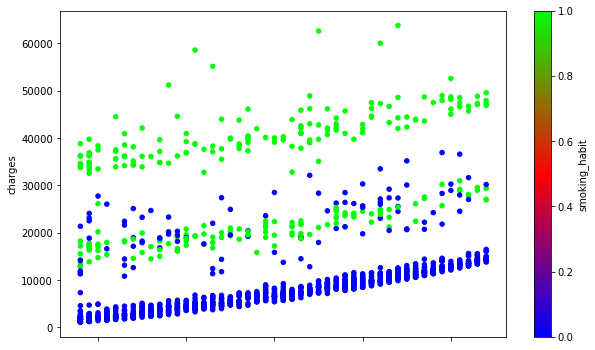

In [90]:
#There's an obvious trend of as age increase, the medical bill is going to increase
#Greens are smokers, blues are non-smokers
bill.plot(kind='scatter', x='age', y='charges', c='smoking_habit', colormap = 'brg',figsize=(10,6));
plt.xlabel=['age']

print((bill.corr()['charges']))  

age                   0.299008
bmi                   0.198341
children              0.067998
charges               1.000000
smoking_habit         0.787251
BMI_Classification    0.204069
Name: charges, dtype: float64


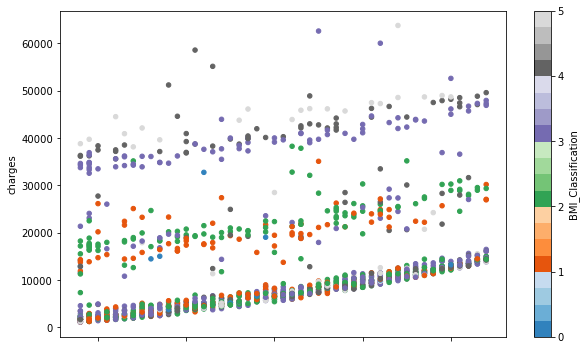

In [51]:
bill.plot(kind='scatter', x='age', y='charges', c='BMI_Classification', colormap = 'tab20c',figsize=(10,6));

print((bill.corr()['charges']))  

In [23]:
#In average, smokers' bills are 3.8 times higher than non smokers
bill.groupby('smoker').mean()

,age,bmi,children,charges,smoking_habit
smoker,,,,,
no,39.385338,30.651795,1.090226,8434.268298,0.0
yes,38.514599,30.708449,1.113139,32050.231832,1.0


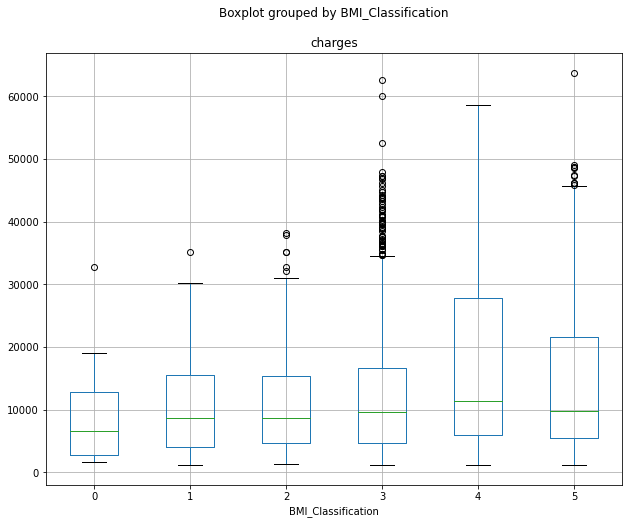

In [52]:
bill.sort_values('bmi', ascending=True, inplace=True)
bill.boxplot('charges',by='BMI_Classification',figsize=(10,8));
#Every BMI classifications have similar minimum charge, but the Obese groups have a much higher upper limit

In [28]:
#In median, smokers' bills are 4.69 times higher than non smokers
bill.groupby('smoker').median().round(2)

,age,bmi,children,charges,smoking_habit
smoker,,,,,
no,40,30.35,1,7345.41,0
yes,38,30.45,1,34456.35,1


In [29]:
#As BMI level increases, the charages is likely going to increase too
bill.groupby('BMI_Classification').mean().sort_values('bmi').round(2)

,age,bmi,children,charges,smoking_habit
BMI_Classification,,,,,
Underweight,32.38,17.61,1.05,8657.62,0.24
Normal,36.75,22.63,1.13,10434.53,0.22
Overweight,38.92,27.60,1.06,10987.51,0.19
Class 1 Obese,39.38,32.34,1.15,14419.67,0.19
Class 2 Obese,41.91,37.17,1.02,17054.93,0.22
Morbid Obesity,40.63,43.07,1.13,16707.66,0.23


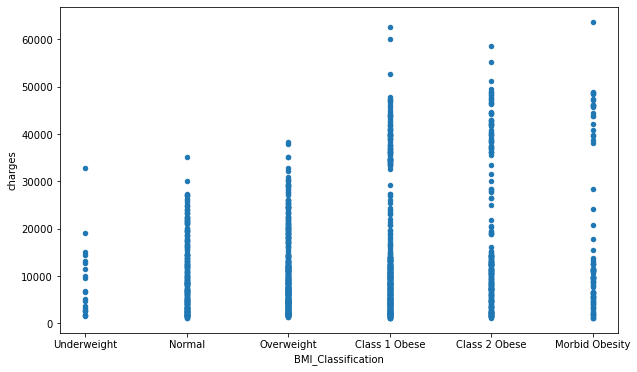

In [30]:
#As BMI increases, the upper limit and the median charge for the medical bill will likely
#to increase especially for class 1 obesesity and beyond
bill.sort_values('bmi', ascending=True, inplace=True)
bill.plot(kind='scatter', x='BMI_Classification', y='charges', figsize=(10, 6));

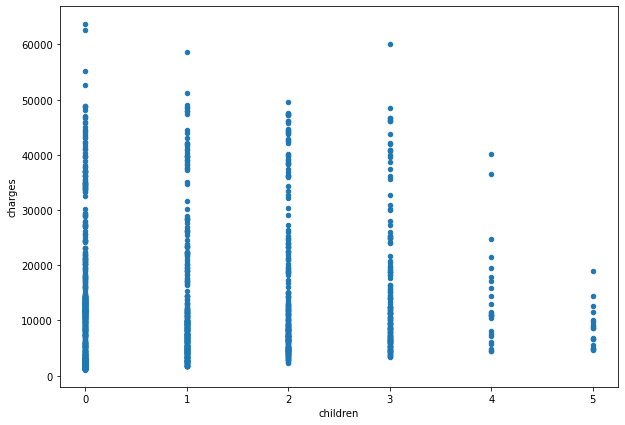

In [31]:
#Most patients have less than 3 children, it seesm like having more children will likely to decrease
#the medical bill amount. Of course corration doesn't mean causation, or having children can change
#someone's diet/living style
bill.plot(kind='scatter', x='children', y='charges', figsize=(10,7));

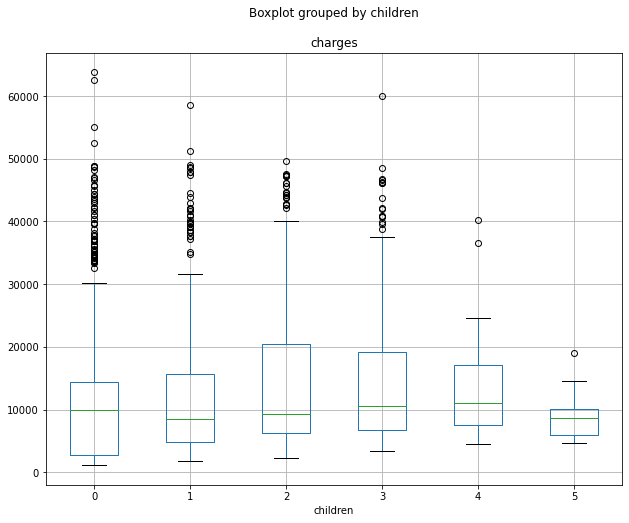

In [64]:
bill.sort_values('children', ascending=True, inplace=True)
bill.boxplot('charges',by='children',figsize=(10,8));
#It could be explained that there are very few people that has more than 3 children, or they are less willing
#to spend money on medical expense

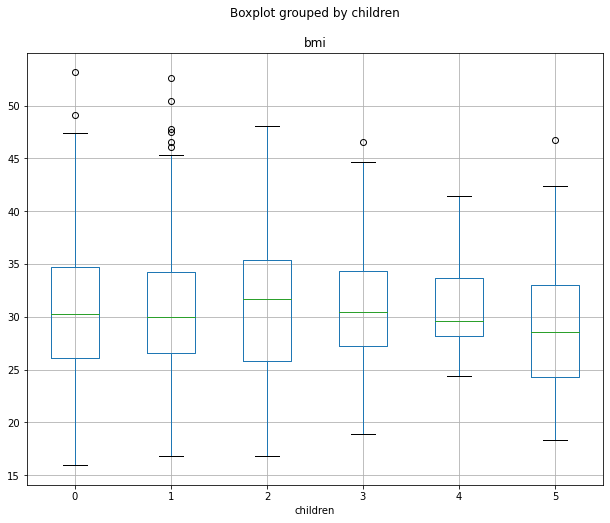

In [65]:
bill.sort_values('children', ascending=True, inplace=True)
bill.boxplot('bmi',by='children',figsize=(10,8));

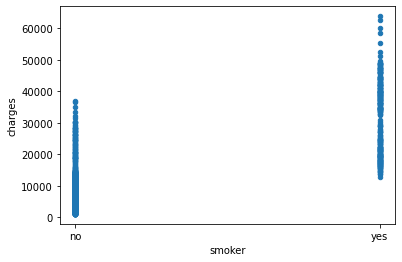

In [32]:
#smokers also has a higher chance to receive a higher medical bill, due to their smoking habit
bill.plot(kind='scatter', x='smoker', y='charges');

